# **Implementation of neural network from scratch using NumPy**



In [2]:
#data set

#A
a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]
#B
b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]
#C
c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0]

In [3]:
#create labels
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

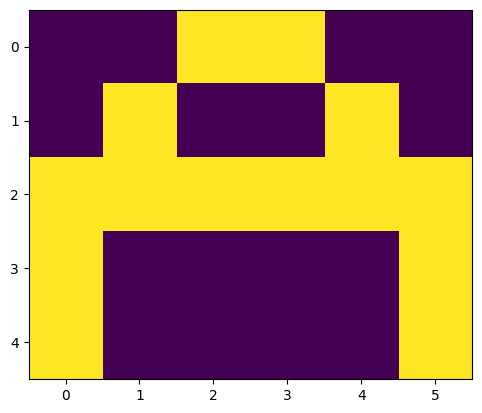

In [5]:
#visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show

In [6]:
# convert data and labels into numpy array
x = [np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
#input layer (1,30)
#hidden layer (1,5)
#output layer (3,3)

In [8]:
#activation function
def sigmoid(x):
  return (1/(1+np.exp(-x)))

In [9]:
#creating forward NN
def f_forward(x,w1,w2):
  #hidden layer
  z1 = x.dot(w1)
  a1 = sigmoid(z1)
  #output layer
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)
  return (a2)

In [10]:
#intialize the weights
def generate_wt(x,y):
  l = []
  for i in range(x*y):
    l.append(np.random.randn())
  return (np.array(l).reshape(x,y))

In [11]:
def loss(out,Y):
  s = (np.square(out-Y))
  s = np.sum(s)/len(y)
  return(s)

In [12]:
#back propagation
def back_prop(x,y,w1,w2,alpha):
  #hidden layer
  z1 = x.dot(w1)
  a1 = sigmoid(z1)
  #output layer
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  d2 = (a2-y)
  d1 = np.multiply((w2.dot(d2.transpose())).transpose(), np.multiply(a1, (1-a1)))

  #gradient
  w1_adj = x.transpose().dot(d1)
  w2_adj = a1.transpose().dot(d2)

  #update weights
  w1 = w1-(alpha*(w1_adj))
  w2 = w2-(alpha*(w2_adj))
  return (w1,w2)

In [13]:
def train(x,Y,w1,w2,alpha=0.01,epoch=10):
  acc =[]
  loss_values = []
  for j in range(epoch):
    l = []
    for i in range(len(x)):
      out = f_forward(x[i],w1,w2)
      l.append((loss(out,Y[i])))
      w1,w2 = back_prop(x[i],y[i],w1,w2,alpha)
    print("Epochs:", j+1, "acc:", (1-(sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    loss_values.append(sum(l)/len(x))
  return(acc,loss_values,w1,w2)

In [14]:
def predict(x,w1,w2):
  Out = f_forward(x,w1,w2)
  maxm=0
  k=0
  for i in range(len(Out[0])):
    if(maxm<Out[0][i]):
      maxm=Out[0][i]
      k=i
  if(k==0):
    print("Image is of letter A")
  elif(k==1):
    print("Image is of letter B")
  else:
    print("Image is of letter C")
  plt.imshow(x.reshape(5,6))
  plt.show()

In [15]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1,"\n",w2)

[[-0.33811774  0.3077445  -1.89253592  0.65848852  0.87860065]
 [-1.23437698 -1.35277627 -0.70509598  0.26871035 -1.14050296]
 [ 0.04395771  1.18105261  0.49116914 -0.6943818  -0.03908666]
 [-1.15926792 -0.22671544 -0.57297703 -0.97436613 -0.07526491]
 [ 1.02312144 -0.13902299  1.20310485  0.82407079 -0.4266386 ]
 [ 0.40446445  0.58520325  1.08807418  1.00757167  0.74318151]
 [ 0.26471714 -0.19262913 -1.14569756 -0.96124162  2.4303602 ]
 [-0.3808874   0.18525164 -0.03199654 -0.7684964  -0.52671849]
 [ 0.2911312  -0.4231019   1.62551607  1.04876253  1.4022357 ]
 [ 1.93613018 -0.48530929  0.36290928  0.18894407 -0.67345622]
 [ 1.11613158  1.3338003  -0.39846418 -1.39225453 -0.02348524]
 [-0.12200364 -0.17069316 -0.28939157 -0.61526904 -0.96882125]
 [-0.98795155 -1.05297837 -0.04723226  0.71099479  0.79885635]
 [-0.34111784  0.81296023 -0.50627545 -0.66411922 -0.38019266]
 [ 0.20184583 -2.65031523 -0.65543821 -1.0624694  -0.56982037]
 [-0.13650813  0.10229767 -0.85291161  0.35632682  1.50

In [16]:
acc,loss,w1,w2 = train(x,y,w1,w2,0.1,100)

Epochs: 1 acc: 68.0073350818638
Epochs: 2 acc: 70.23240575977734
Epochs: 3 acc: 72.3093251894817
Epochs: 4 acc: 74.25846804279257
Epochs: 5 acc: 76.1008767875415
Epochs: 6 acc: 77.85239129941384
Epochs: 7 acc: 79.51831014238205
Epochs: 8 acc: 81.0907402087053
Epochs: 9 acc: 82.5520681309677
Epochs: 10 acc: 83.88423001613474
Epochs: 11 acc: 85.07708062609534
Epochs: 12 acc: 86.13043457847975
Epochs: 13 acc: 87.05187667932877
Epochs: 14 acc: 87.85423247315227
Epochs: 15 acc: 88.553344356995
Epochs: 16 acc: 89.16578187482365
Epochs: 17 acc: 89.70694344457699
Epochs: 18 acc: 90.19002913531745
Epochs: 19 acc: 90.62580877973197
Epochs: 20 acc: 91.02283899335345
Epochs: 21 acc: 91.38783792320982
Epochs: 22 acc: 91.7260629590767
Epochs: 23 acc: 92.04163365659194
Epochs: 24 acc: 92.33778962989176
Epochs: 25 acc: 92.61709080922957
Epochs: 26 acc: 92.88157152264172
Epochs: 27 acc: 93.13285898308533
Epochs: 28 acc: 93.37226464309336
Epochs: 29 acc: 93.60085483850894
Epochs: 30 acc: 93.819505524583

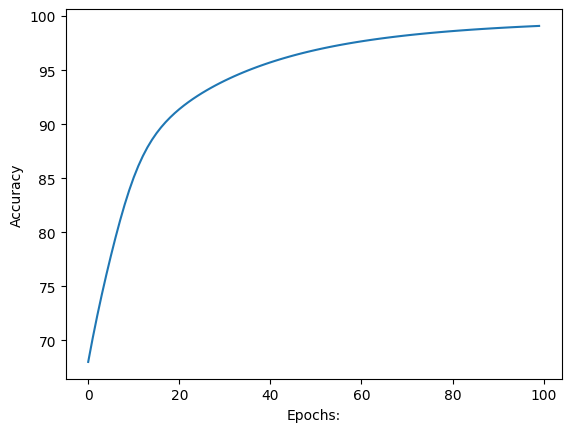

In [17]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs:')
plt1.show()

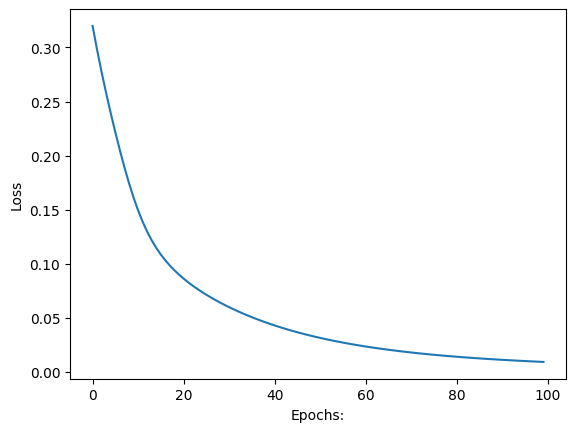

In [18]:
#plot loss
plt1.plot(loss)
plt.ylabel('Loss')
plt.xlabel('Epochs:')
plt1.show()

Image is of letter C


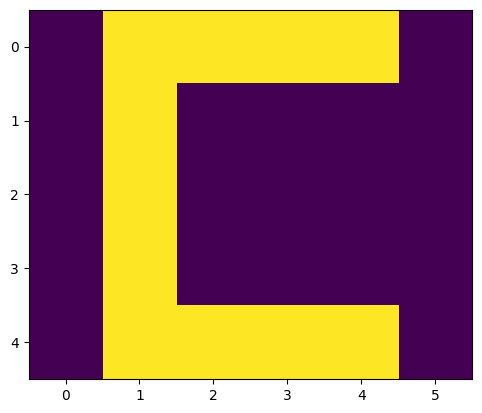

In [19]:
predict(x[2],w1,w2)

Image is of letter B


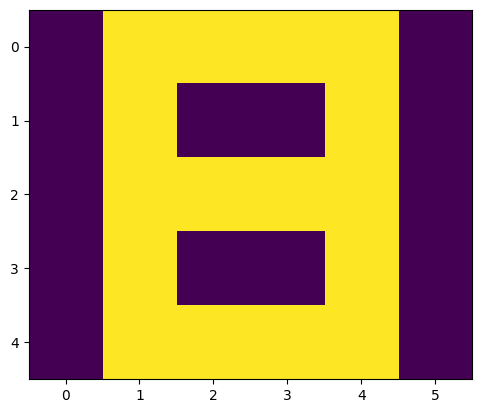

In [20]:
predict(x[1],w1,w2)

Image is of letter A


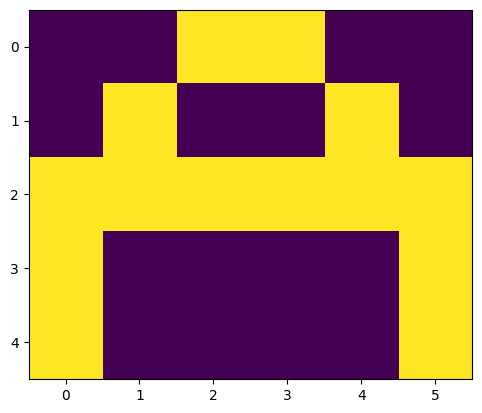

In [21]:
predict(x[0],w1,w2)